<a href="https://colab.research.google.com/github/guten-morgen3776/NN-practice/blob/main/%E7%95%B3%E3%81%BF%E8%BE%BC%E3%81%BF%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_tr = (x_tr.astype("float32") / 255.0)
x_te = (x_te.astype("float32") / 255.0)

x_tr, x_val = x_tr[:-5000], x_tr[-5000:]
y_tr, y_val = y_tr[:-5000], y_tr[-5000:]

In [ ]:
print(x_tr.shape)
print(x_val.shape)
print(x_te.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


In [ ]:
BATCH = 128
#バッチとは一度の更新でまとめて学習に使うサンプル
#ミニバッチとはバッチサイズがデータ全体より小さい
ds_tr = tf.data.Dataset.from_tensor_slices((x_tr, y_tr)).shuffle(10000).batch(BATCH)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(BATCH)
ds_te = tf.data.Dataset.from_tensor_slices((x_te, y_te)).batch(BATCH)

In [ ]:
model = tf.keras.Sequential([
    layers.Input((28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu', padding='same'), #畳み込み層
    layers.MaxPooling2D(), #pooling層
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')

])
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)



In [ ]:
history = model.fit(
    ds_tr,
    validation_data=ds_val,
    epochs=10,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=2),
    ],
    verbose=1
)

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 59s 137ms/step - accuracy: 0.9963 - loss: 0.0097 - val_accuracy: 0.9926 - val_loss: 0.0296
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 58s 135ms/step - accuracy: 0.9965 - loss: 0.0101 - val_accuracy: 0.9932 - val_loss: 0.0319
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 83s 137ms/step - accuracy: 0.9977 - loss: 0.0069 - val_accuracy: 0.9922 - val_loss: 0.0358


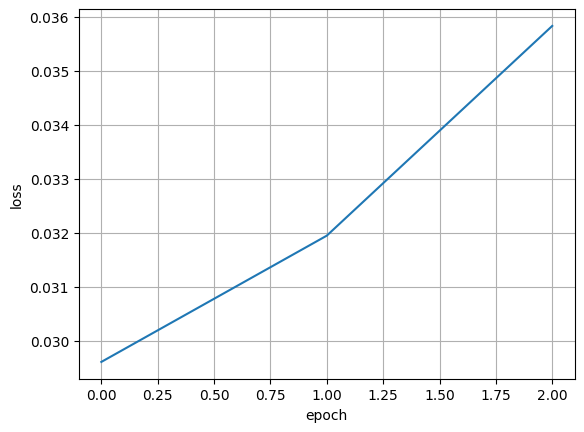

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

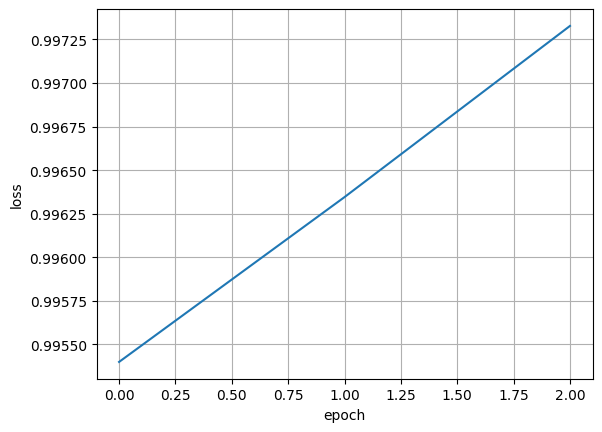

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()